<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


## Контакты
Михаил Белоус (tg: @psycho1388)

In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
# YOUR CODE
# Смотрим какие типы у колонок
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [7]:
# Пеобразуем 'TotalSpent' в тип данных float
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [8]:
# Проверяем сколько значений Nan в каждой колонке
data.isna().sum() 

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
# заменяем Nan в 'TotalSprnt' на 0 
data.TotalSpent.fillna(0, inplace=True)
None

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

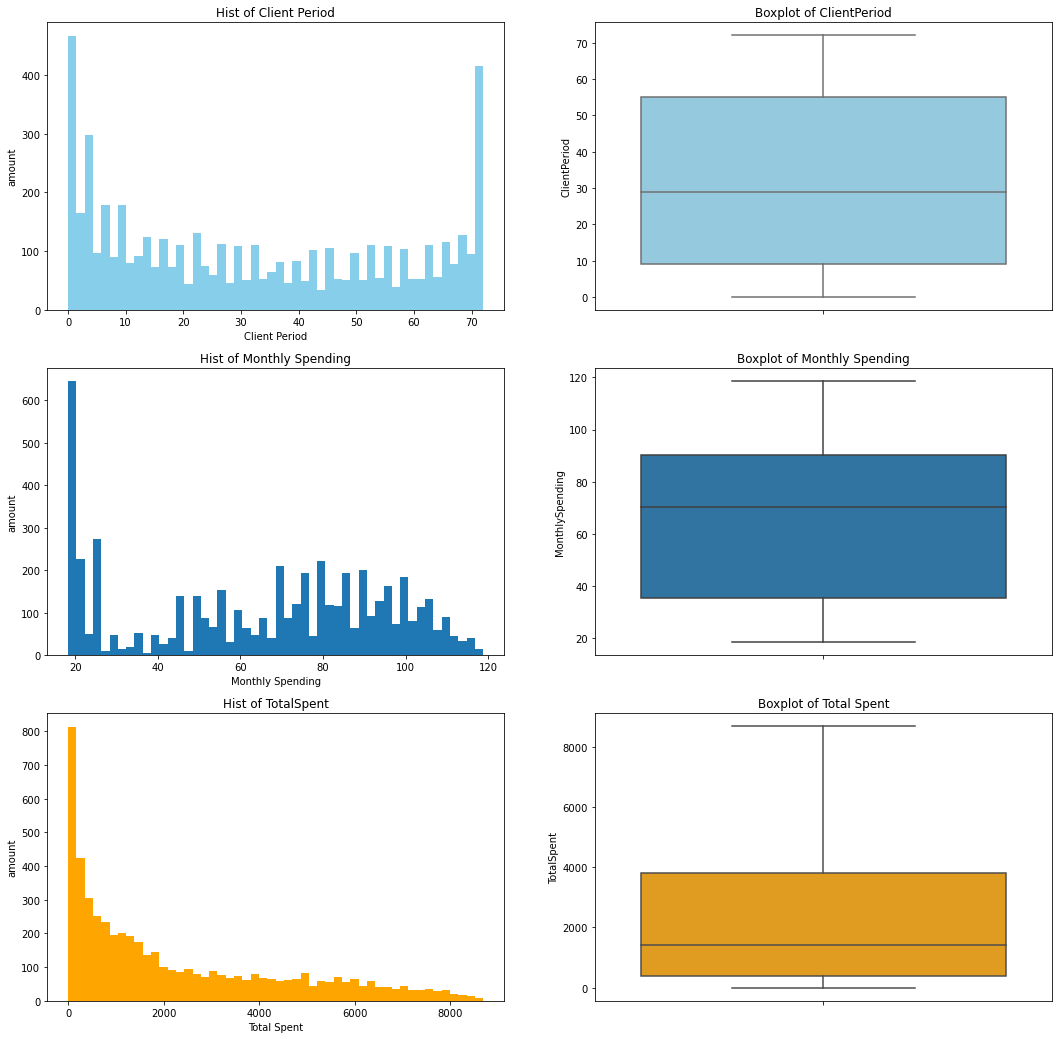

In [10]:
# YOUR CODE
figure, axs = plt.subplots(3, 2, figsize=(18, 18))

axs[0, 0].set_title("Hist of Client Period")
axs[0, 0].set_xlabel("Client Period")
axs[0, 0].set_ylabel("amount")
axs[0, 0].hist(data[num_cols[0]], bins=50, color = "skyblue")
sns.boxplot(y="ClientPeriod", data=data, ax=axs[0, 1], color = "skyblue")
axs[0, 1].set_title("Boxplot of ClientPeriod")

axs[1, 0].set_title("Hist of Monthly Spending")
axs[1, 0].set_xlabel("Monthly Spending")
axs[1, 0].set_ylabel("amount")
axs[1, 0].hist(data[num_cols[1]], bins=50)
sns.boxplot(y="MonthlySpending", data=data, ax=axs[1, 1])
axs[1, 1].set_title("Boxplot of Monthly Spending")

axs[2, 0].set_title("Hist of TotalSpent")
axs[2, 0].set_xlabel("Total Spent")
axs[2, 0].set_ylabel("amount")
axs[2, 0].hist(data[num_cols[2]], bins=50, color="orange")
sns.boxplot(y="TotalSpent", data=data, ax=axs[2, 1], color="orange")
axs[2, 1].set_title("Boxplot of Total Spent")
None

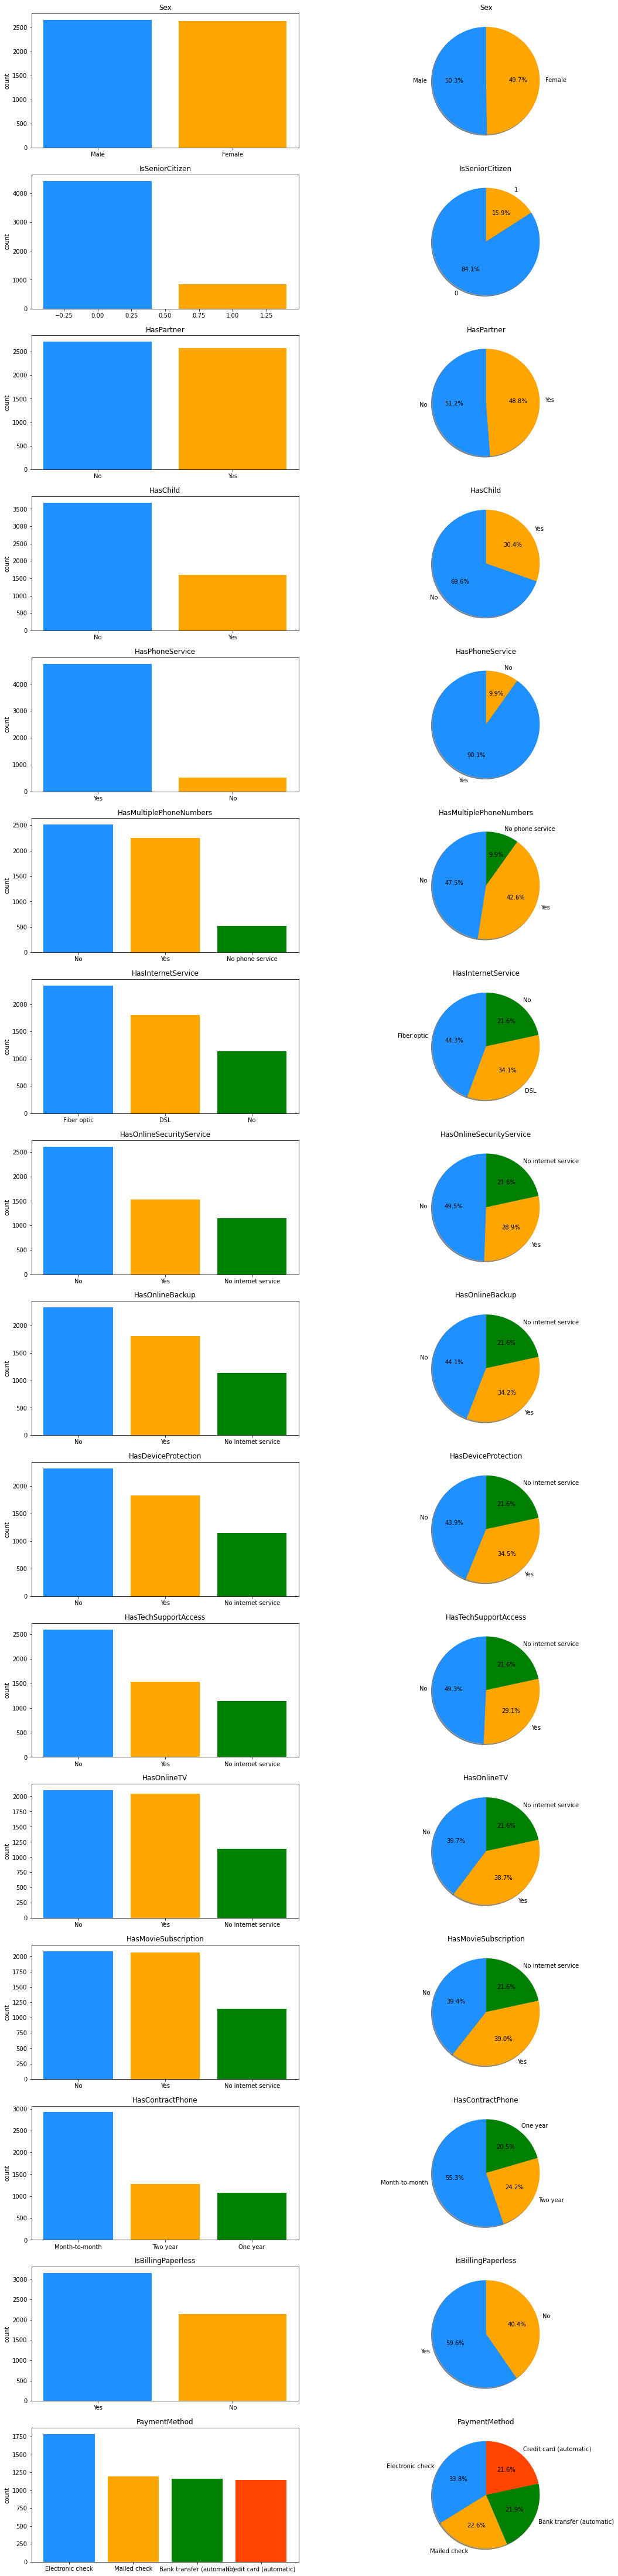

In [11]:
figure, axs = plt.subplots(16, 2, figsize=(18, 80))
colors = ['dodgerblue', 'orange', 'green', 'orangered']

for i in range(len(cat_cols)):
    axs[i, 0].bar(data[cat_cols[i]].value_counts().index, data[cat_cols[i]].value_counts().values, 
        color=colors)
    axs[i, 0].set_ylabel('count')
    axs[i, 0].set_title(cat_cols[i])
    axs[i, 1].pie(data[cat_cols[i]].value_counts().values, labels=data[cat_cols[i]].value_counts().index,
                  autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    axs[i, 1].set_title(cat_cols[i])

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [12]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

In [14]:
'''
labelencoder = LabelEncoder()
label_features = data[cat_cols].apply(labelencoder.fit_transform) # применяем LabelEncoder

enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(label_features).toarray()) # применяем OneHotEncoder

numeric_data = data[num_cols] # numerical data
X = pd.concat([numeric_data, enc_df], axis=1) # соединяем
y = data['Churn']
X.head()
'''

"\nlabelencoder = LabelEncoder()\nlabel_features = data[cat_cols].apply(labelencoder.fit_transform) # применяем LabelEncoder\n\nenc = OneHotEncoder()\nenc_df = pd.DataFrame(enc.fit_transform(label_features).toarray()) # применяем OneHotEncoder\n\nnumeric_data = data[num_cols] # numerical data\nX = pd.concat([numeric_data, enc_df], axis=1) # соединяем\ny = data['Churn']\nX.head()\n"

In [15]:
numerical_transformer = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler())

categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

data_transformer = make_column_transformer((numerical_transformer, num_cols),
                                           (categorical_transformer, cat_cols))

classifier = make_pipeline(data_transformer, LogisticRegression(random_state=42, max_iter=10000))

In [16]:
param_grid = {'logisticregression__C': [0.1, 1.0, 10, 100, 1000] }

In [17]:
clf = GridSearchCV(estimator=classifier, 
                   param_grid=param_grid,
                   cv=5, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   verbose=10)
                 

In [18]:
X_train = data.iloc[:, :-1]
y_train = pd.DataFrame(data['Churn'])

In [19]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    4.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.3s finished
/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'Tota

In [20]:
print("best hpyerparameters : ",clf.best_params_)
print("roc-auc :",clf.best_score_)

best hpyerparameters :  {'logisticregression__C': 10}
roc-auc : 0.8451139790603974


In [21]:
X_test = data = pd.read_csv('./test.csv')

In [22]:
X_test.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [23]:
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X_test.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [24]:
X_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [25]:
y_pred = clf.predict_proba(X_test)

In [26]:
y_pred

array([[0.96239844, 0.03760156],
       [0.26734939, 0.73265061],
       [0.31427545, 0.68572455],
       ...,
       [0.24730893, 0.75269107],
       [0.35771663, 0.64228337],
       [0.99022644, 0.00977356]])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [28]:
# YOUR CODE
import catboost 

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_train, y_train, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
model = boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', silent=True)
grid = {'n_estimators': [1000, 1200, 1700, 2000, 2500],
    'learning_rate': np.linspace(0.01, 0.04, 10),
        'depth': [2, 3, 4, 5]}

In [ ]:
grid_search_result = model.grid_search(grid, 
                                       X=X_train_cat, 
                                       y=y_train_cat, 
                                       plot=False)

In [ ]:
grid_search_result.values()

In [29]:
boosting_model = catboost.CatBoostClassifier(n_estimators=1000, 
                                             cat_features=cat_cols,
                                             eval_metric='AUC',
                                             silent=True,
                                             learning_rate=0.026,
                                             depth=4)

boosting_model.fit(X_train_cat, y_train_cat)

y_train_predicted = boosting_model.predict_proba(X_train_cat)
y_test_predicted = boosting_model.predict_proba(X_test_cat)

In [30]:
train_auc = roc_auc_score(y_train_cat.values, y_train_predicted[:, 1])
test_auc = roc_auc_score(y_test_cat.values, y_test_predicted[:, 1])

print('Train roc_auc:', train_auc, end='\n\n')
print('Test roc_auc:', test_auc)

Train roc_auc: 0.8827174576633792

Test roc_auc: 0.8256896408418837


In [31]:
boosting_model = catboost.CatBoostClassifier( silent = True,
                                             cat_features=cat_cols,
                                             depth=2)

boosting_model.fit(X_train_cat, y_train_cat)

y_train_predicted = boosting_model.predict_proba(X_train_cat)
y_test_predicted = boosting_model.predict_proba(X_test_cat)

In [32]:
train_auc = roc_auc_score(y_train_cat.values, y_train_predicted[:, 1])
test_auc = roc_auc_score(y_test_cat.values, y_test_predicted[:, 1])

print('Train roc_auc:', train_auc, end='\n\n')
print('Test roc_auc:', test_auc)

Train roc_auc: 0.8633338396701776

Test roc_auc: 0.8296838780580158


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [33]:
best_model = boosting_model# какая-то предыдущая модель

In [53]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.